Group Members: Denise Campos (1001947774), Rama Abdeljaber (1001882221), Sofia Rueda (1002167885), Sahiti Mutyala (1001913945)

#**Part 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv("Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.value_counts()

,,,,,,,,,,,,,,count
RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
6671,15667932,Bellucci,758,Spain,Female,43,10,0.00,2,1,1,55313.44,0,1
6664,15766185,She,850,Germany,Male,31,4,146587.30,1,1,1,89874.82,0,1
6665,15667632,Birdseye,703,France,Female,42,7,0.00,2,0,1,72500.68,0,1
6666,15599024,Hope,506,Spain,Male,32,8,0.00,2,0,1,182692.80,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3334,15599078,Yang,619,Germany,Female,41,5,92467.58,1,1,0,38270.47,0,1
3335,15702300,Walker,671,France,Male,27,5,0.00,2,0,0,120893.07,0,1
3336,15660735,T'ang,581,Spain,Female,31,6,0.00,2,1,0,188377.21,0,1


In [ ]:
df.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}\n")

Unique values in 'RowNumber': [    1     2     3 ...  9998  9999 10000]

Unique values in 'CustomerId': [15634602 15647311 15619304 ... 15584532 15682355 15628319]

Unique values in 'Surname': ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

Unique values in 'CreditScore': [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523

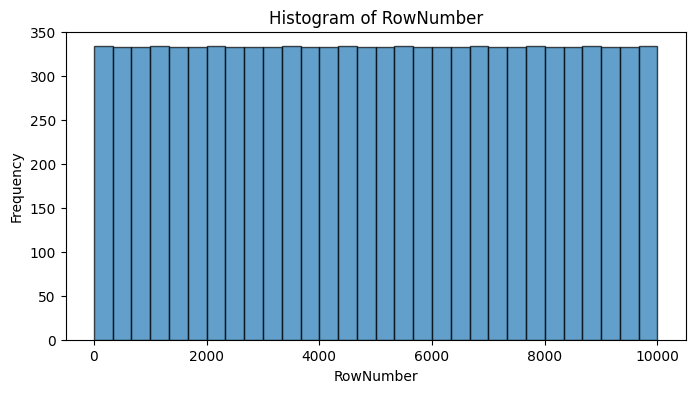

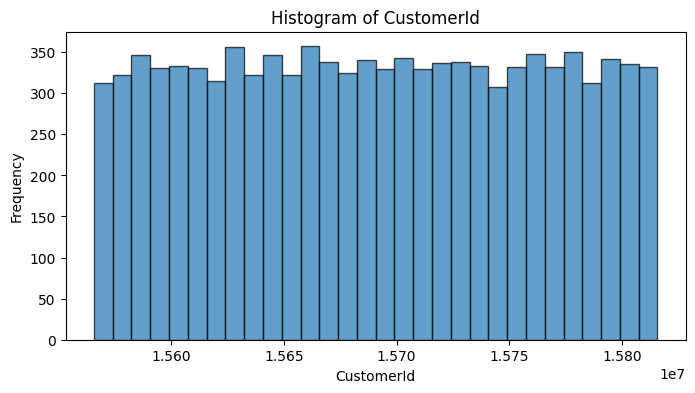

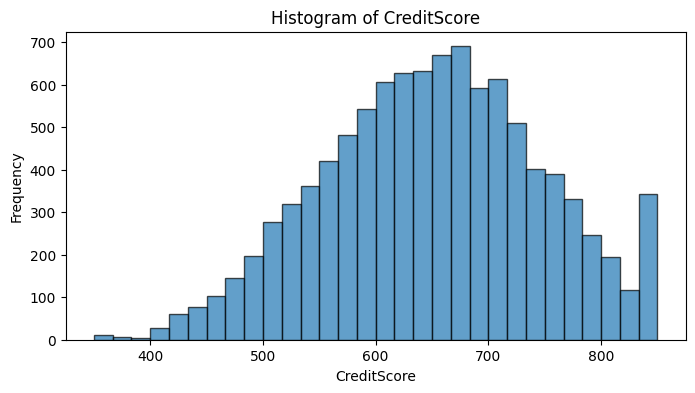

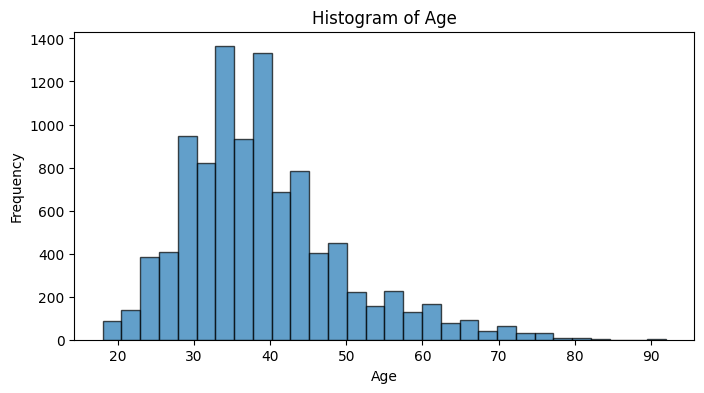

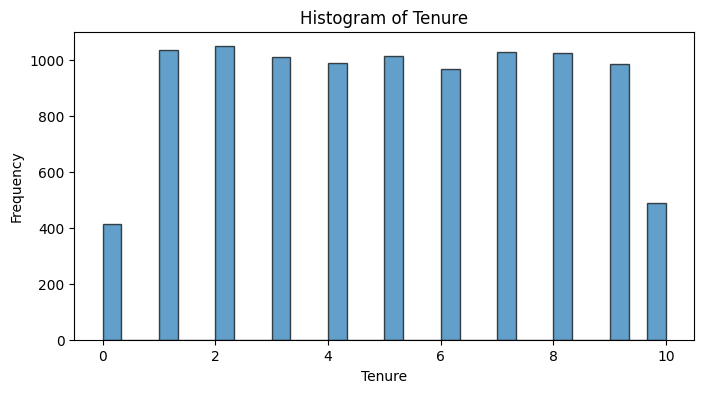

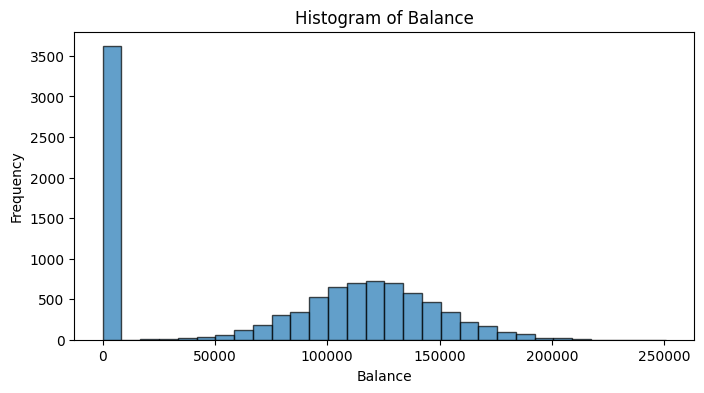

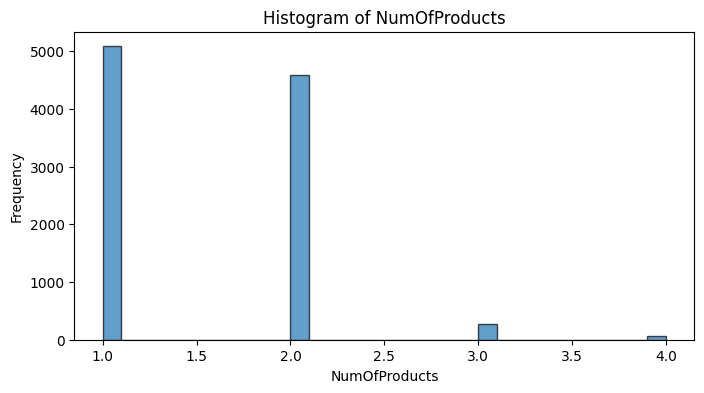

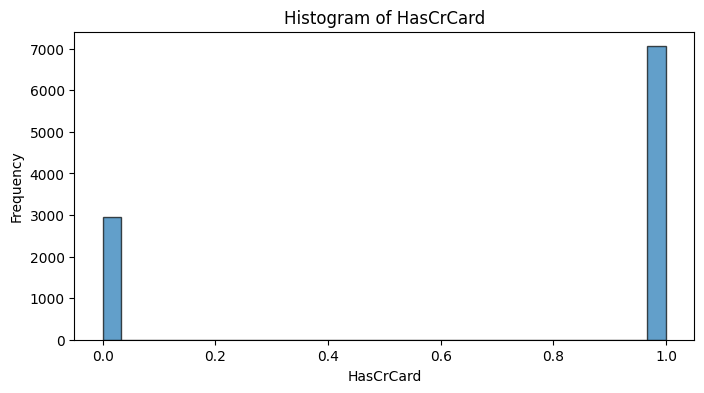

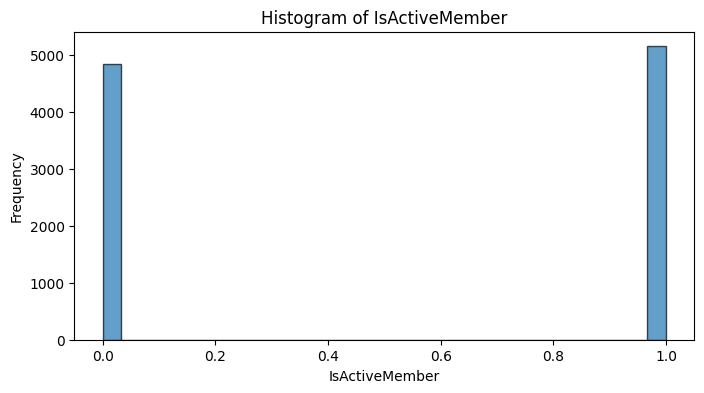

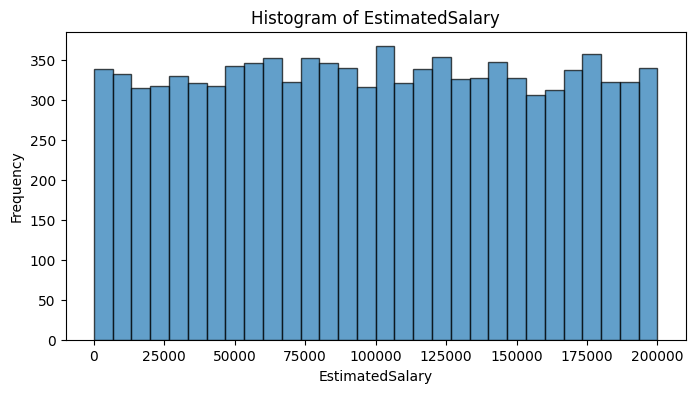

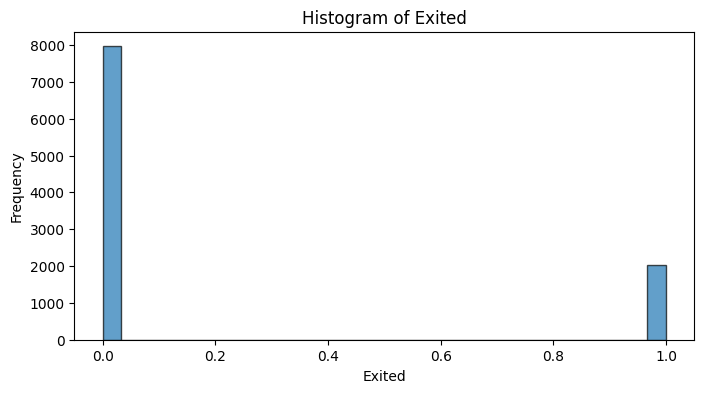

In [ ]:
## make hist for each column

num_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in num_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

from these histrograms we can conclude a few things.


**Creditscore Hist:** shows some potential outliers on the right but we're actually going to keep them becaue an extremely high credit score can impact prediction
**Age Hist:** heavily positively skewed
**Tenure Hist:** somewhat normal dist.
**Balance Hist:** normal dist except for 3500 accounts with a 0.00 balance.
I only analyzed these because the others are trivial/not neccessaryt to look further into them.



We need to fix our balance column before starting our classification model. Lets feature engineer a new column called ZeroBalance with is one hot encoded to show if the accont balance is 0 or not

In [ ]:
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited']) ## indepent var's
y = df['Exited'] ## target var's
X = pd.get_dummies(X, drop_first=True) ## one hot encode the categorical variables

## for the model we only keep the column that give us valuable data, that is we are dropping the trivial ones

In [ ]:
X['ZeroBalance'] = (X['Balance'] == 0).astype(int)
X = X.drop(columns=['Balance']) ## dropping the original Balance column if you want to exclude it from modeling
X.head()

## here we feautre engineered a column to indicate if a person has a 0 balance

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,ZeroBalance
0,619,42,2,1,1,1,101348.88,False,False,False,1
1,608,41,1,1,0,1,112542.58,False,True,False,0
2,502,42,8,3,1,0,113931.57,False,False,False,0
3,699,39,1,2,0,0,93826.63,False,False,False,1
4,850,43,2,1,1,1,79084.10,False,True,False,0


In [ ]:
### next lets standarize our numerical columns , this can potentially improve model results

numeric_cols = ['CreditScore', 'Age', 'ZeroBalance', 'EstimatedSalary']
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])
X.head()

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,ZeroBalance
0,-0.326221,0.293517,2,1,1,1,0.021886,False,False,False,1.328428
1,-0.440036,0.198164,1,1,0,1,0.216534,False,True,False,-0.752769
2,-1.536794,0.293517,8,3,1,0,0.240687,False,False,False,-0.752769
3,0.501521,0.007457,1,2,0,0,-0.108918,False,False,False,1.328428
4,2.063884,0.388871,2,1,1,1,-0.365276,False,True,False,-0.752769


#**Part 2**

The three classification models i am choosing are: logistic regression, random forrest, and XG boost.

 I am choosing logistic regression because it is a straightforward and interpretable model, ideal for binary classification tasks like churn prediction. It also handles standardized numeric and binary-encoded categorical data well.


I am choosing random forrest becausae it is tends to perform well even if there are nonlinear relationships between the features and target. It’s generally robust to overfitting and effective with both numerical and categorical features.
  
  
I am choosing XG boost because it is an advanced boosting algorithm known for its high performance and accuracy, especially in binary classification tasks. It’s typically faster than other boosting algorithms and handles large datasets well, making it suitable for cases where feature interactions and nonlinear relationships are important

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()   #(max_iter=100) # Increased max_iter to ensure convergence

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

[[1549   58]
 [ 312   81]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.58      0.21      0.30       393

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.78      2000

Accuracy Score: 0.815


analysis on logistic regression:
True Positives (TP): 1549
False Positives (FP): 58
False Negatives (FN): 312
True Negatives (TN): 81

our f1-score for not chruning is good, at .89, this shows us that the model does a good job of predicting customers who do not churn.  


our f1-score for churning is poor, at .30, it indicates that the model struggles to effectively identify instances of churning.

the stark difference could possiblty mean that our dataset is imbalanced.

In [ ]:
## lets try a random forrest classifier

model2 = RandomForestClassifier() #(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [ ]:
# Step 8: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
print("Accuracy Score:", accuracy_score(y_test, y_pred2))

Confusion Matrix:
[[1545   62]
 [ 213  180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Accuracy Score: 0.8625


analysis on random forrest classfier:
True Positives (TP): 1545
False Positives (FP): 62
False Negatives (FN): 213
True Negatives (TN):  180

Again, Class 1 has a lower F1-score, indicating that the model struggles more with identifying churn cases accurately.

In [ ]:
## now lets do a XG boost model

from xgboost import XGBClassifier

model3 = XGBClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))
print("\nClassification Report:")
print(classification_report(y_test, y_pred3))
print("Accuracy Score:", accuracy_score(y_test, y_pred3))

Confusion Matrix:
[[1525   82]
 [ 208  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.47      0.56       393

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000

Accuracy Score: 0.855


analysis on XG boost:
True Positives (TP): 1525
False Positives (FP): 82
False Negatives (FN): 208
True Negatives (TN):  185

Again, our model is having trouble identifying memebers who do churn and predicting their churn.

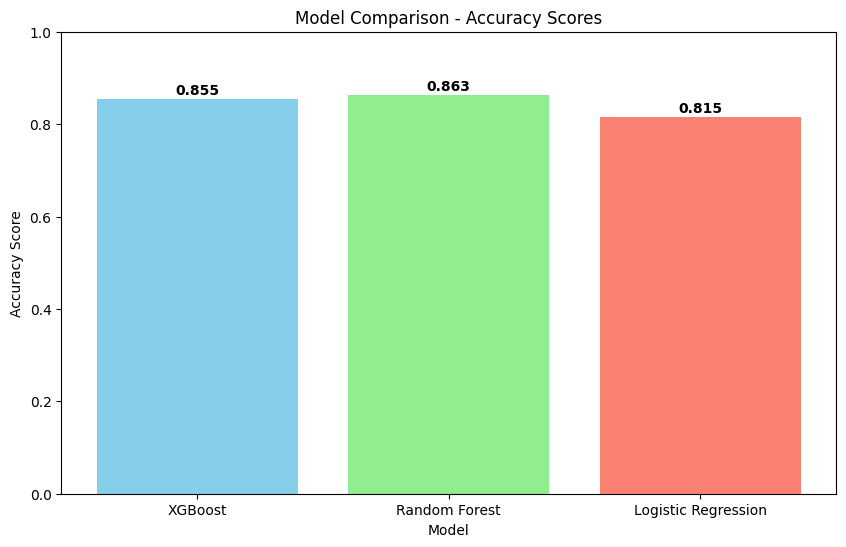

In [ ]:
model_names = ['XGBoost', 'Random Forest', 'Logistic Regression']
accuracy_scores = [0.855, 0.8625, 0.815]  # Replace with your model's accuracy scores

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightgreen', 'salmon'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Scores')
plt.ylim(0, 1)  # Adjust y-axis limit for accuracy

#Display scores on each bar
for i, v in enumerate(accuracy_scores):
   plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

# Show the plot
plt.show()

Based on Accuracy, the model that performed the best was Random forrest with an accruacy of .863

# **Part 4 **



In [ ]:
## Since random forrest was the best performing, we are going tune its hyper parameters.

from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300], # Testing 100, 200, and 300 trees to find the best balance between accuracy and computation.
    'max_depth': [None, 10, 20, 30], #Trying None (no limit), 10, 20, and 30 to test if limiting depth helps prevent overfitting.
    'min_samples_split': [2, 5, 10] #Testing values of 2, 5, and 10 to control how splits are made, potentially improving generalization by requiring more samples per split.
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(estimator=model2, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit Grid Search
grid_search_rf.fit(X_train, y_train)

# Best parameters and best accuracy
best_params_rf = grid_search_rf.best_params_
best_accuracy_rf = grid_search_rf.best_score_

print("Best Hyperparameters:", best_params_rf)
print("Best Cross-Validation Accuracy:", best_accuracy_rf)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.860375


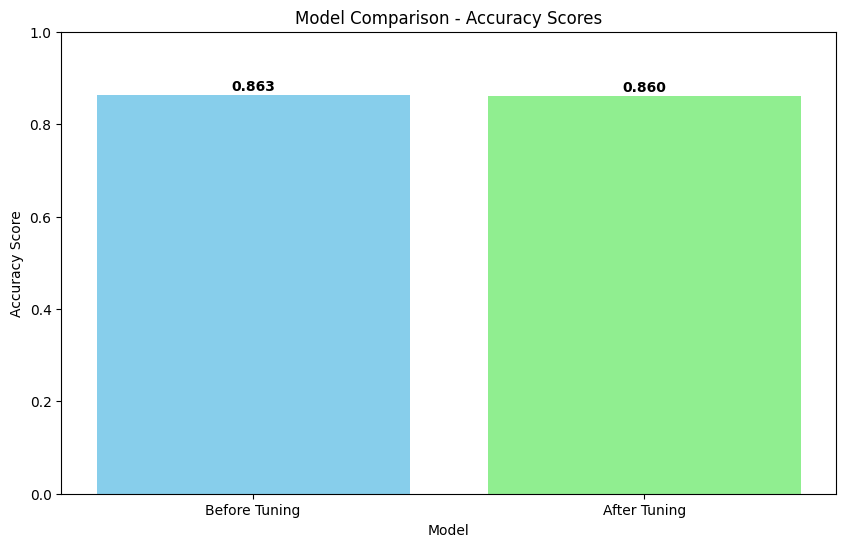

In [ ]:
model_names = ['Before Tuning', 'After Tuning']
accuracy_scores = [0.8625, 0.860375]  # Replace with your model's accuracy scores

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightgreen', 'salmon'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Scores')
plt.ylim(0, 1)  # Adjust y-axis limit for accuracy

#Display scores on each bar
for i, v in enumerate(accuracy_scores):
   plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

# Show the plot
plt.show()

our model shows that accuracy went down after tuning. This could mean several things. The most likely result is that my model is overfitted.  


Lets try to fix that by identifying and removing less important features based on their importance can also enhance the model’s ability to generalize.



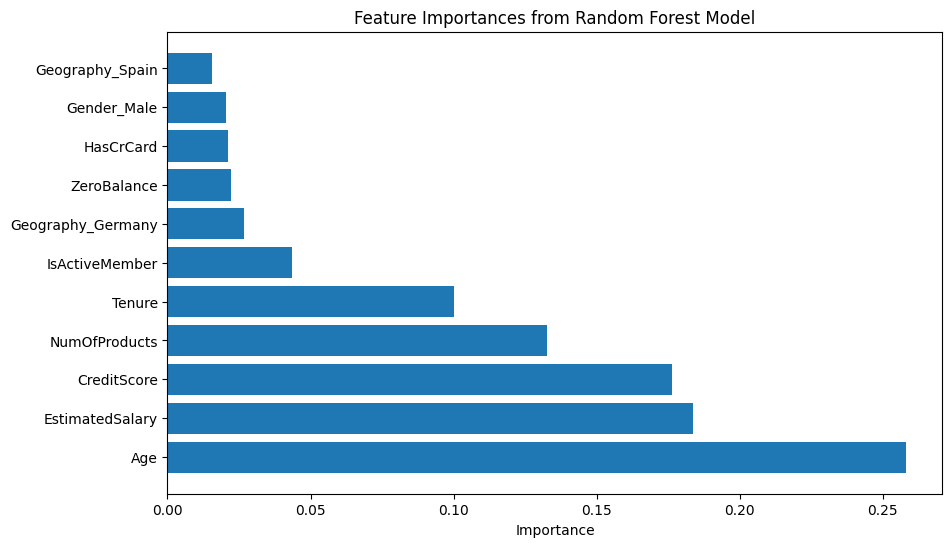

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters for Random Forest with Selected Features: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Accuracy for Random Forest with Selected Features: 0.8407500000000001


In [ ]:

# Fit the Random Forest model to get feature importances

importances = model2.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.show()

# Select features based on importance threshold
threshold = 0.05  # You can set this threshold based on your needs
selected_features = feature_importances[feature_importances['Importance'] > threshold]['Feature']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit a new Random Forest model using selected features
grid_search_rf.fit(X_train_selected, y_train)

# Best parameters and best accuracy with selected features
best_params_rf_selected = grid_search_rf.best_params_
best_accuracy_rf_selected = grid_search_rf.best_score_

print("Best Hyperparameters for Random Forest with Selected Features:", best_params_rf_selected)
print("Best Cross-Validation Accuracy for Random Forest with Selected Features:", best_accuracy_rf_selected)


After removing unimportant feaures and checking the CV grid , we have an even lower accuray at 0.840

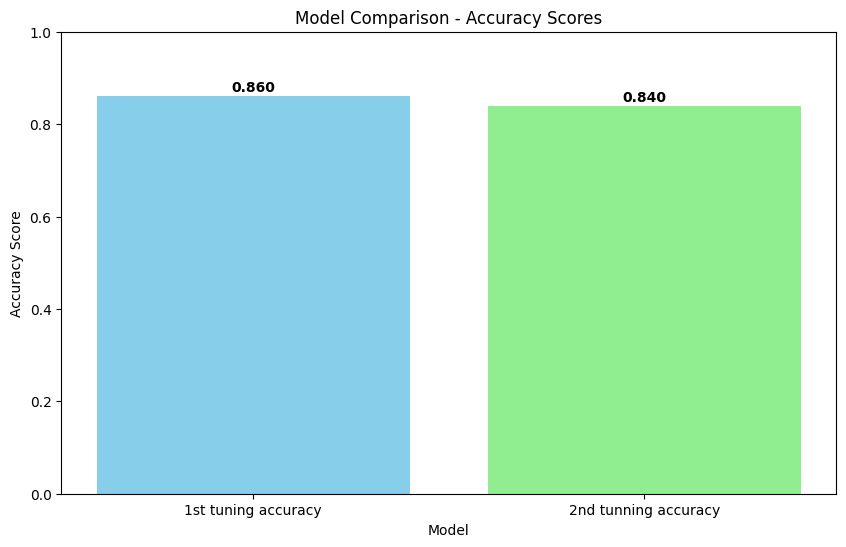

In [ ]:
model_names = ['1st tuning accuracy', '2nd tunning accuracy']
accuracy_scores = [0.860375,0.840075 ]  # Replace with your model's accuracy scores

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Scores')
plt.ylim(0, 1)  # Adjust y-axis limit for accuracy

#Display scores on each bar
for i, v in enumerate(accuracy_scores):
   plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

# Show the plot
plt.show()

Because of this, lets choose the next best model, which is XG boost

In [ ]:

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 10],         # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],     # Fraction of samples to be used for each tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features to be used for each tree
}

# Initialize Grid Search
grid_search_xgb = GridSearchCV(estimator=model3,
                                param_grid=param_grid,
                                scoring='accuracy',
                                cv=5,
                                n_jobs=-1,
                                verbose=1)

# Fit Grid Search to the training data
grid_search_xgb.fit(X_train, y_train)

# Best parameters and best accuracy
best_params_xgb = grid_search_xgb.best_params_
best_accuracy_xgb = grid_search_xgb.best_score_

print("Best Hyperparameters for XGBoost:", best_params_xgb)
print("Best Cross-Validation Accuracy for XGBoost:", best_accuracy_xgb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.6}
Best Cross-Validation Accuracy for XGBoost: 0.8632500000000001


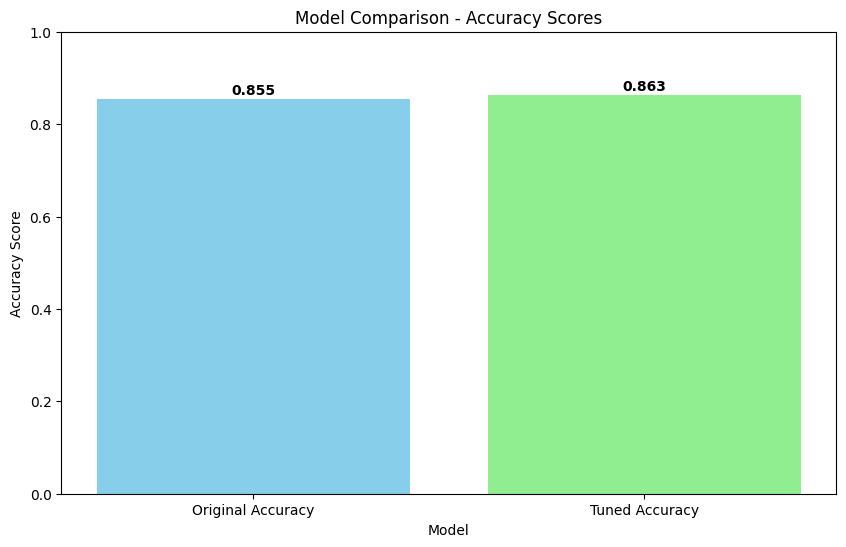

In [ ]:
model_names = ['Original Accuracy', 'Tuned Accuracy']
accuracy_scores = [0.855, 0.86325 ]  # Replace with your model's accuracy scores

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'lightgreen'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Scores')
plt.ylim(0, 1)  # Adjust y-axis limit for accuracy

#Display scores on each bar
for i, v in enumerate(accuracy_scores):
   plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')

# Show the plot
plt.show()

#After choosing and tuning the second best model, i got increased accuracy. The orignal accuracy of my HG boost model was 0.855 , and after hyperparamenter tunning, the next accuracy is 0.863.